<a href="https://colab.research.google.com/github/profandersonvanin01/machine_learning/blob/main/2_Deteccao_Faces_Vis%C3%A3o_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DETECTANDO FACES E AJUSTANDO PARÂMETROS

Nesta aula vamos ver como detectar Faces e utilizar alguns parâmetros adicionais para melhorar as detecções.

Para agilizar vamos importar a imagem em cinza que utilizamos na aula anterior.

In [ ]:
import cv2
from google.colab import drive
drive.mount('/content/drive')
imagem_cinza = cv2.imread('/content/drive/MyDrive/Visao_Computacional_CPS/salvas/imagem_cinza.png')

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(imagem_cinza)

# Detecção de Faces

Para a Detecção de faces, iremos utilizar uma classe especial da biblioteca OpenCV chamada Cascade Classifier.

Crie uma pasta chamada cascades e insira os arquivos de um classificador de imagens já pré-treinado para reconhecimento de faces.

Arquivos do Cascade: https://github.com/profandersonvanin01/laboratorio_ia/tree/main/Cascades


In [ ]:
detector_facial = cv2.CascadeClassifier('/content/drive/MyDrive/Visao_Computacional_CPS/cascades/haarcascade_frontalface_default.xml')

Agora podemos aplicar a variavel ***detector_facial*** em nossa imagem.

In [ ]:
deteccoes = detector_facial.detectMultiScale(imagem_cinza)

Conteúdo da variável deteccoes

In [ ]:
deteccoes

Aqui temos um array em Python com 6 linhas, que significa que o algoritmo encontrou 6 faces nesta imagem.

In [ ]:
len(deteccoes)

Cada linha deste vetor significa:

[677,  72,  68,  68]  => [(posição inicial da detecção x,y), (tamanho da face lar,alt)]

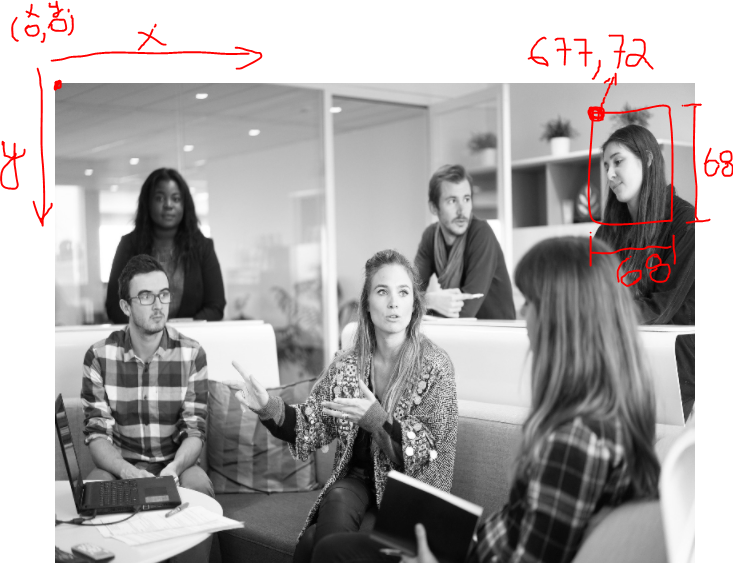

Agora podemos ver os resultados das detecções em nossa imagem.

In [ ]:
for x,y,w,h in deteccoes:
  print(x,y,w,h)

Para exibir os resultados da nossa detecção, vamos carregar a imagem colorida redimensionada.

In [ ]:
imagem_reduzida = cv2.imread('/content/drive/MyDrive/Visao_Computacional_CPS/salvas/imagem_colorida.png')

In [ ]:
cv2_imshow(imagem_reduzida)

Vamos desenhar um retângulo vermelho em cada face detectada, utilizando os valores de x,y,w e h conhecidos.

In [ ]:
for x, y, w, h in deteccoes:
  #print(x,y,w,h)
  cv2.rectangle(imagem_reduzida, (x, y),(x + w, y + h), (0, 0, 255), 5)
cv2_imshow(imagem_reduzida)

Os retângulos gerados sobre as faces encontradas se chamam: Bounding Boxes. Repare que há o que chamamos de falso positivo nos resultados de nossas detecções. Vamos ajustar alguns parâmetros para melhorar nossas detecções.

In [ ]:
deteccoes = detector_facial.detectMultiScale(imagem_cinza, scaleFactor=1.08)
for x, y, w, h in deteccoes:
  #print(x,y,w,h)
  cv2.rectangle(imagem_reduzida, (x, y),(x + w, y + h), (0, 255, 0), 5)
cv2_imshow(imagem_reduzida)

Vamos carregar uma outra imagem para ver como ajustar outros parâmetros de detecção de faces.

In [ ]:
imagem2 = cv2.imread('/content/drive/MyDrive/Visao_Computacional_CPS/imagens/people2.jpg')
imagem_cinza2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)
nova_deteccao = detector_facial.detectMultiScale(imagem_cinza2, scaleFactor = 1.2, minNeighbors=3, minSize=(31,31), maxSize=(100,100))
for (x, y, w, h) in nova_deteccao:
  print(w,h)
  cv2.rectangle(imagem2, (x, y),(x+w,y+h),(0,255,0),3)
cv2_imshow(imagem2)

Os parâmetros scaleFactor = 1.2, minNeighbors=3, minSize=(31,31), maxSize=(100,100) devem ser ajustados de acordo com a imagem a ser analisada. Isso varia de imagem para imagem.

- O parâmetro scaleFactor é realitivo a escala da imagem.
- O parâmetro minNeighbors se refere a quantidade de bounding boxes gerados para cada face detectada para escolher a melhor.
- O Parâmetro minSize é relativo ao tamanho mínimo de cada detecção.
- O Parâmetro maxsize é relativo ao tamanho máximo de cada detecção.

# Parabéns

Nesta aula você aprendeu como configurar outros parâmetros no detector de Faces para melhorar as detecções de acordo com cada imagem.

Na próxima aula, vamos utilizar uma biblioteca chamada YOLO para fazer a detecção de vários tipos diferentes de objetos.

Até lá. ;-)